In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datacalc

# Peak Data

C:\Users\Steven\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\Steven\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\Steven\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\Steven\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with ne

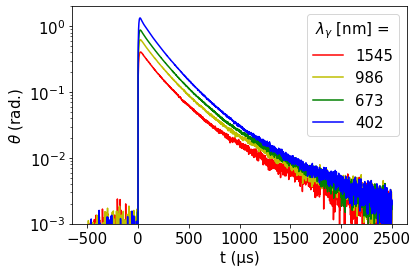

In [4]:
Chipnum = 'LT139'
KIDnum = 1
Tbath = 120
wvls = [1545,986,673,402]
Pread = [96]

plt.rcParams.update({'font.size': 15})
# fig,axs = plt.subplots(1,2,figsize = (12,4))
fig,axs = plt.subplots(1,1,figsize = (6,4))
axs = [axs]
# fig.suptitle('{}, KID{}, at {} mK'.format(Chipnum,KIDnum,Tbath))
colors = ['r','y','g','b']
for i in range(len(wvls)):
    for j in range(len(Pread)):
        peak,_ = datacalc.get_peakdata(Chipnum,KIDnum,Pread[j],Tbath,wvls[i])
        t = np.arange(len(peak))-500
        axs[0].plot(t,peak,color=colors[i])
#         axs[1].plot(t,peak,color=colors[i])
axs[0].set_yscale('log')
axs[0].legend(Pread,title=r'$P_{read}=$')
axs[0].set_ylim(1e-3,2)
# axs[1].set_ylim(None,1.4)
for j in range(1): 
    axs[j].set_xlabel('t (µs)')
    axs[j].set_ylabel(r'$\theta$ (rad.)')
    axs[j].legend(wvls,title=r'$\lambda_{\gamma}$ [nm] = ')        
#         axs[j].legend(Pread,title=r'$P_{read}=$')

In [5]:
fig.tight_layout()
fig.savefig('{}_KID{}_{}mK.pdf'.format(Chipnum,KIDnum,Tbath))

---
# GR data

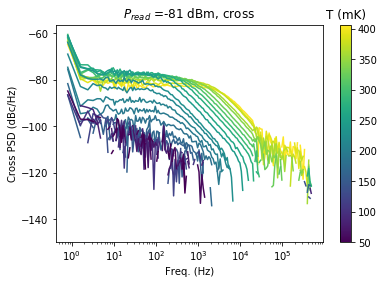

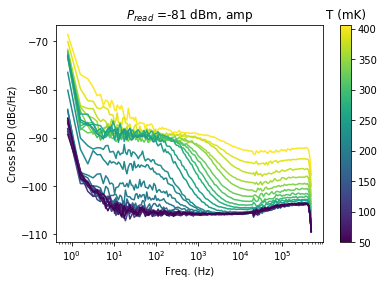

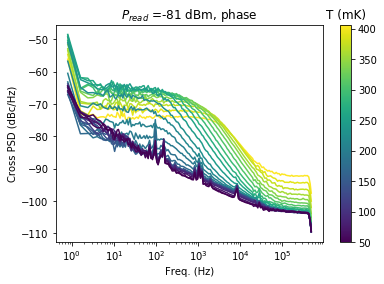

In [5]:
Chipnum = 'LT165'
KIDnum = 2
specar = ['cross','amp','phase']

Pread = np.trim_zeros(datacalc.get_grPread(Chipnum,KIDnum))[:1]
cmap = matplotlib.cm.get_cmap('viridis')
for i in range(len(Pread)):
    for spec in specar:
        grfig,graxs = plt.subplots(1,1)
        Temp = datacalc.get_grTemp(Chipnum,KIDnum,Pread[i])
        Temp = np.flip(Temp)
        norm = matplotlib.colors.Normalize(Temp.min(),Temp.max())
        for j in range(len(Temp)):
            freq,SPR = datacalc.get_grdata(
                Chipnum,KIDnum,Pread[i],Temp[j],spec=spec)
            SPR[SPR==-140] = np.nan
            graxs.plot(freq,SPR,color=cmap(norm(Temp[j])))
        graxs.set_xscale('log')
        graxs.set_title(r'$P_{{read}}$ =-{} dBm, {}'.format(Pread[i],spec))
        graxs.set_xlabel('Freq. (Hz)')
        graxs.set_ylabel('Cross PSD (dBc/Hz)')
        clb = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm,cmap=cmap))
        clb.ax.set_title('T (mK)')

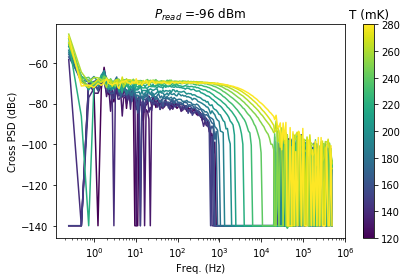

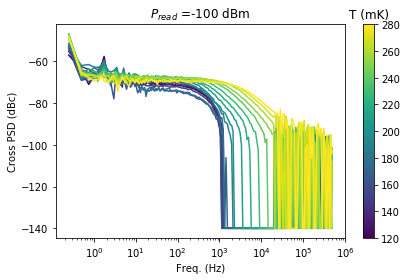

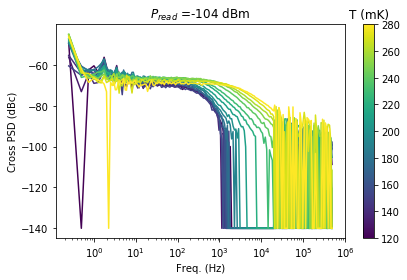

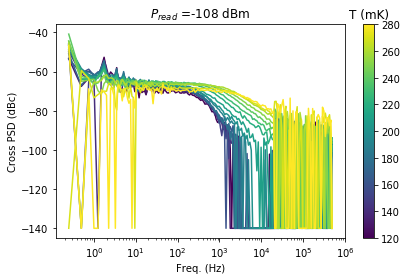

In [67]:
    grfig.tight_layout()
    grfig.savefig('GR_{}_KID{}_{}.png'.format(Chipnum,KIDnum,Pread[i]))